# 24 and 12 hour samples

Collected from 12:00 31st July - 12:00 1st August 2023. Notes on the analysis here - https://docs.google.com/document/d/1koU44WMo4EW6fIoTr0dbnfsw2nR690wQGMgOFjILRcg/edit

Run in the 24hr_env environment

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import matplotlib.pyplot as plt
from matplotlib.dates import HourLocator, DateFormatter
import datetime as dt
import numpy as np
import scipy


## Reading in the MARTI and pathogen database data

Dataframes created in /Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/24hCubTests_21092023/Scripts/marti_4_6_hr_analysis.ipynb notebook

In [44]:
read_lin_meta = pd.read_csv(
    "/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/24hCubTests_21092023/24hrCub_combined_marti_read_data"
    )

phi_lin_meta = pd.read_csv("/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/24hCubTests_21092023/24hrCub_combined_pathogen_read_data"
    )

## Diversity
Alpha diversity - Shannon diversity
This takes into acccount number of different species and species evenness.

Not entirely sure how this calculation is working and want to compare using proportions and my relaative abundance to see if they are the same and then dig in deeper.

In [67]:
samples_24_12 = read_lin_meta[
    read_lin_meta["Time_hrs"].isin([24, 12]) &
    (read_lin_meta['Species'] != 'Unassigned') & #Remove the unassigned species
    (read_lin_meta['read count'] != 0)           #Remove the rows where read count is 0
]

# Calculate the proportions of each taxa in each sample
proportions = samples_24_12.groupby('Sample')['Species'].value_counts(normalize=True)

# Calculate the Shannon diversity index for each sample
shannon_diversity = proportions.groupby(level=0).apply(lambda x: -(x * np.log(x)).sum())
shannon_diversity

Sample
12h_00:00_12:00    3.970292
12h_12:00_00:00    4.222059
24h_12:00_12:00    4.012640
Name: proportion, dtype: float64

Trying to iterate on above code by using read coutn rather than counting species, however this no longer is just looking at species - not sure if that is a problem?

In [70]:
# Calculate the proportions of each species in each sample - using read_count column
proportions_2 = samples_24_12.groupby('Sample')['read count'].apply(lambda x: x / x.sum())

# Calculate the Shannon diversity index for each sample
shannon_diversity = proportions_2.groupby(level=0).apply(lambda x: -(x * np.log(x)).sum())
shannon_diversity

Sample
12h_00:00_12:00    2.840137
12h_12:00_00:00    3.747089
24h_12:00_12:00    3.255642
Name: read count, dtype: float64

In [64]:
#With relative abundance instead
# Calculate the Shannon diversity index for each sample
shannon_diversity = samples_24_12.groupby('Sample').apply(lambda x: -(x['rel_abundance'] * np.log(x['rel_abundance'])).sum())
shannon_diversity

Sample
12h_00:00_12:00     0.537042
12h_12:00_00:00    15.454261
24h_12:00_12:00     7.969532
dtype: float64

## Plotting

Start by looking at fungi phyla

In [12]:
fungi_phyla = ["Ascomycota", "Basidiomycota", "Oomycota"]

fungi_ph = read_lin_meta[
    read_lin_meta["Phylum"].isin(fungi_phyla)&
    (read_lin_meta["rel_abundance"] > 0.1) &
    read_lin_meta["Time_hrs"].isin([24, 12])
]

#9 Fungal classes so could plot these
fungi_ph["Class"].value_counts()

Class
Dothideomycetes       106
Agaricomycetes         13
Sordariomycetes        11
Oomycota                7
Leotiomycetes           5
Unassigned              4
Tremellomycetes         4
Eurotiomycetes          3
Microbotryomycetes      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Fungal Classes (12 and 24 hour samples)')

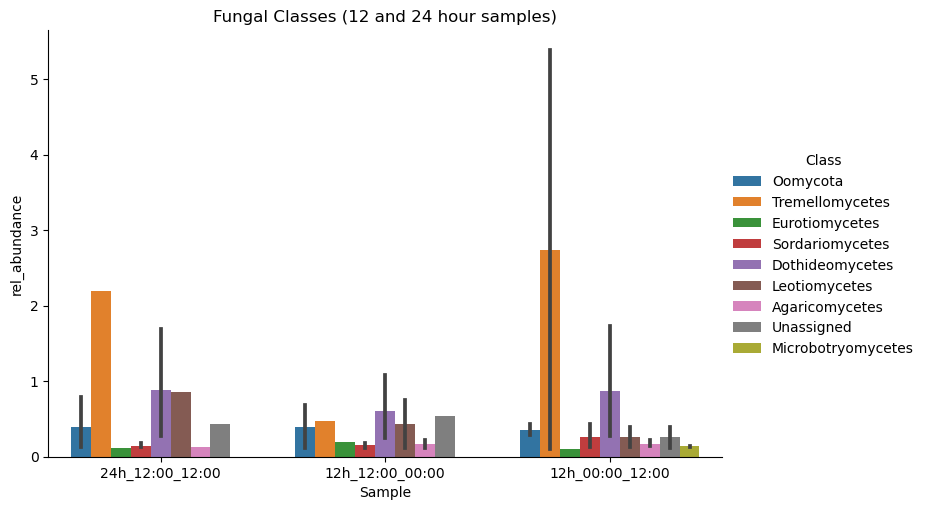

In [17]:
sns.catplot(
    data=fungi_ph,
    x="Sample",
    y="rel_abundance",
    kind="bar",
    aspect=1.5,
    hue="Class",
)
plt.title("Fungal Classes (12 and 24 hour samples)")

### Species level

In the 4 and 6 hour samples i removed species present less than once, not going to do that here as there are only 3 samples.

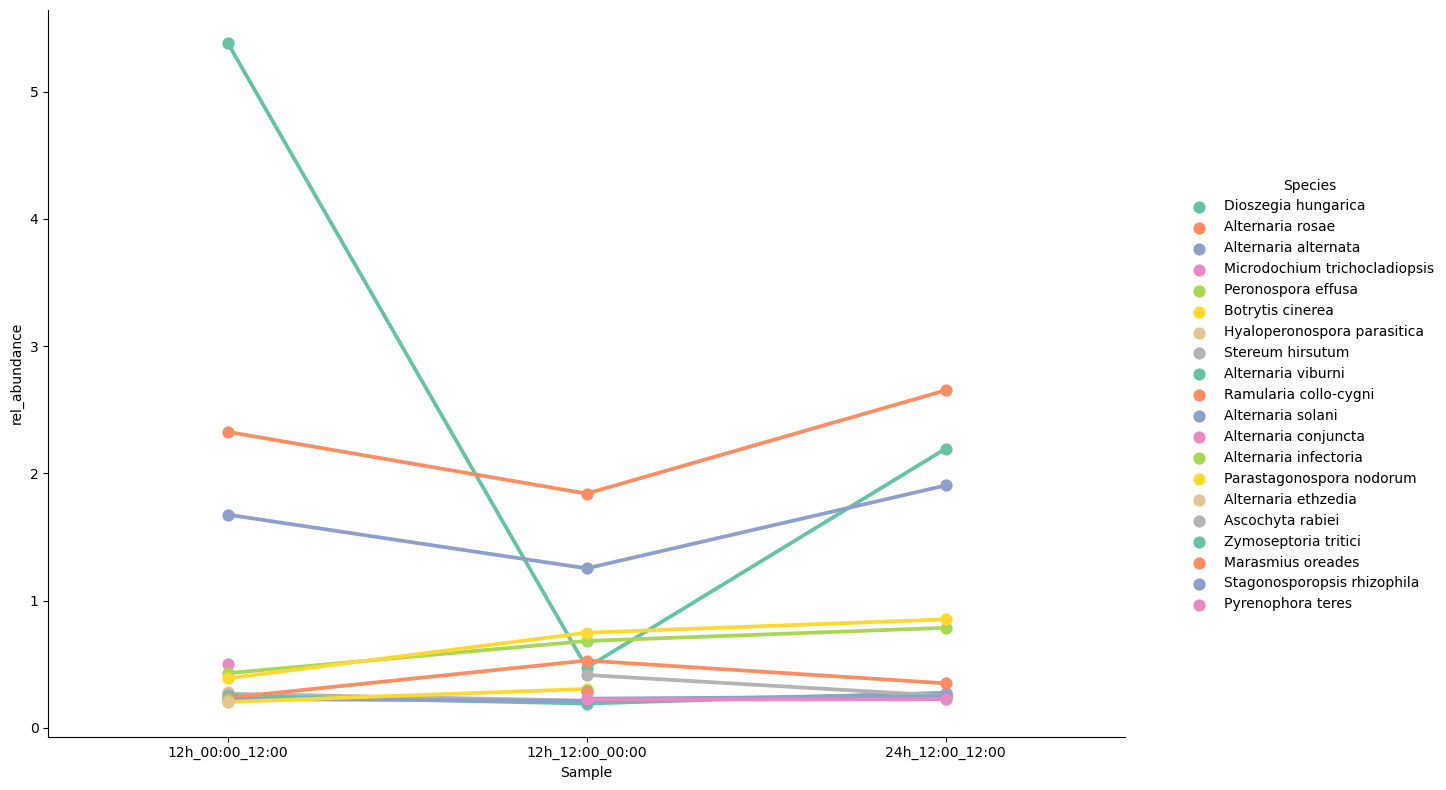

In [20]:
#Top 15 fungi species accross all samples
top_15 = fungi_ph[fungi_ph['Species'] != 'Unassigned'].groupby("Sample").apply(
    lambda x: x[x['Species'] != 'Unassigned'].sort_values("rel_abundance", ascending=False).head(15)
).reset_index(drop=True)

top15_4 = sns.catplot(
    data=top_15,
    x="Sample",
    y="rel_abundance",
    kind="point",
    hue="Species",
    height=8,
    aspect=1.5,  # Adjust the aspect ratio of each subplot
    margin_titles=True,  # Add space for subplot titles
    legend_out=True,  # Move the legend outside the plot area,
    palette = "Set2"
)

In [41]:
fungi_data = read_lin_meta[
    read_lin_meta["Phylum"].isin(fungi_phyla)&
    (read_lin_meta["rel_abundance"] > 0.2) &
    read_lin_meta["Time_hrs"].isin([12, 24])&
    (read_lin_meta["Species"] != "Unassigned")
]